## Review classification on sentiment analysis -  SWIVEL

### Objective

To classify the reviews of customer feedback as either positive or negative using pre-trained Submatrix-wise Vector Embedding Learner (SWIVEL) model using a small collected review datasets.


### Basic introduction of NLP and SWIVEL
Genealy, it require an amount of data to train and a long time to train a NLP model for a specific dataset. Transfer learning is commonly used in this case to conduct the sentiment analsis for Natural Language Processing (NLP) problem. 

Swivel performs approximate
factorization of the point-wise mutual information
matrix via stochastic gradient descent.
It uses a piecewise loss with special handling
for unobserved co-occurrences, and thus makes
use of all the information in the matrix.


The codes and framework are implemented in Keras. For a quick start, you can find the following tutorials:

* Shazeer, Noam, Ryan Doherty, Colin Evans, and Chris Waterson. "Swivel: Improving embeddings by noticing what's missing." arXiv preprint arXiv:1602.02215 (2016).

* [Deep Transfer Learning for Natural Language Processing: Text Classification with Universal Embeddings](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial: How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples make use of TensorFlow Hub, which allows pretrained models to easily be loaded into TensorFlow.


There are two basic parts to understand the NLP processing: word embbedings and co-occurrence matrix. 

###  [Pretrained Word Embeddings](https://www.analyticsvidhya.com/blog/2020/03/pretrained-word-embeddings-nlp/)

Pretrained Word Embeddings are the embeddings learned in one task that are used for solving another similar task.

These embeddings are trained on large datasets, saved, and then used for solving other tasks. That’s why pretrained word embeddings are a form of Transfer Learning.

CBOW (Continuous Bag Of Words) and Skip-Gram are two most popular frames for word embedding. In CBOW the words occurring in context (surrounding words) of a selected word are used as inputs and middle or selected word as the target. Its the other way round in Skip-Gram, here the middle word tries to predict the words coming before and after it.

**Why do we need Pretrained Word Embeddings?**

Pretrained word embeddings capture the semantic and syntactic meaning of a word as they are trained on large datasets. They are capable of boosting the performance of a Natural Language Processing (NLP) model. These word embeddings come in handy during hackathons and of course, in real-world problems as well.

But why should we not learn our own embeddings? Well, learning word embeddings from scratch is a challenging problem due to two primary reasons:

* 1 Sparsity of training data

* 2 Large number of trainable parameters


### [Co-occurrence matrix](https://towardsdatascience.com/word2vec-made-easy-139a31a4b8ae)
A co-occurrence matrix tells us how often a particular pair of words occur together. Each value in a co-occurrence matrix is a count of a pair of words occurring together.
 
Generally, a co-occurrence matrix will have specific entities in rows (ER) and columns (EC). The purpose of this matrix is to present the number of times each ER appears in the same context as each EC. As a consequence, in order to use a co-occurrence matrix, you have to define your entites and the context in which they co-occur.

You can refer to more details [here](https://iksinc.online/tag/co-occurrence-matrix/)

In [26]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

 ### Pretrained word embedding model
 
In this case, we used a pretrained embedding model (word level) called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  This was trained by Google on gnews data and can convert RAW text into vectors. 

In [ ]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

## Data preparation
The data coming from [Movie Review Polarity Dataset](https://machinelearningmastery.com/prepare-movie-review-data-sentiment-analysis/)

In [1]:
from os import listdir
import numpy as np
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


### Preprare for variable data (X)

In [5]:
# specify directory to load
directory = './data/txt_sentoken/neg'
files = listdir(directory)
nf = len(files)
sr0 = np.empty(len(files),dtype=object)


# walk through all files in the folder
for fi in range(nf):
    filename = files[fi]
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        continue
# create the full path of the file to open
    path = directory + '/' + filename
# load document
    doc = load_doc(path)
    sr0[fi] = doc

    #st = np.array(doc,dtype='object')
    #sr0[fi] = st.reshape(1,)

In [6]:
# specify directory to load
directory = './data/txt_sentoken/pos'
files = listdir(directory)
nf = len(files)
sr1 = np.empty(len(files),dtype=object)


# walk through all files in the folder
for fi in range(nf):
    filename = files[fi]
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        continue
# create the full path of the file to open
    path = directory + '/' + filename
# load document
    doc = load_doc(path)
    #sr1[fi] = np.array(doc,dtype=object)
    sr1[fi] = doc
    #st = np.array(doc,dtype=object)
    #sr1[fi] = st.reshape(1,)

In [7]:
sr = np.concatenate((sr0,sr1))

### Prepare for the label data (Y)

In [8]:
labels = [np.zeros(len(sr0)),np.ones(len(sr1))]
lsa = np.array(labels)
final_labels = lsa.reshape(2000,)

### Split the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sr, final_labels, test_size=0.20, random_state=101)

### let's see how the sentences are represented by vectors

In [10]:
hub_layer(X_train[:3])

<tf.Tensor: id=177, shape=(3, 20), dtype=float32, numpy=
array([[ 5.08664656e+00, -5.42909479e+00,  5.36379051e+00,
         5.66583812e-01, -6.23635626e+00, -5.98613071e+00,
        -2.92170787e+00,  2.38274646e+00,  4.24179840e+00,
        -2.13325286e+00, -2.79979253e+00,  3.39131546e+00,
        -2.56928372e+00,  6.33380175e-01, -7.93896437e+00,
         3.41055346e+00,  7.97056770e+00, -5.04076958e+00,
        -6.62077904e+00, -2.72977996e+00],
       [ 9.55341053e+00, -7.27930689e+00,  1.23950338e+01,
        -1.26030290e+00, -1.00054712e+01, -9.40223408e+00,
        -7.00794458e+00,  2.38411069e+00,  9.76185322e+00,
        -8.46047974e+00, -5.17542696e+00,  5.50068140e+00,
        -4.91278648e+00,  5.85663226e-03, -1.32589035e+01,
         8.64748383e+00,  8.81379032e+00, -7.98923635e+00,
        -1.32350035e+01, -4.61827040e+00],
       [ 5.09217167e+00, -7.38665247e+00,  8.19837379e+00,
        -1.33976054e+00, -9.40329456e+00, -7.61010313e+00,
        -5.72330618e+00,  1.698

### Build the model

In [11]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
pn = int(len(X_train)*0.2)
x_val1 = X_train[:pn]
part_x_train = X_train[pn:]

y_val1 = y_train[:pn]
part_y_train =y_train[pn:]

In [14]:
history = model.fit(part_x_train,
                    part_y_train,
                    epochs=40,
                    batch_size=64,
                    validation_data=(x_val1, y_val1),
                    verbose=1)

Train on 1280 samples, validate on 320 samples
Epoch 1/40
1280/1280 [==============================] - 2s 1ms/sample - loss: 0.7803 - accuracy: 0.5414 - val_loss: 0.6968 - val_accuracy: 0.5719
Epoch 2/40
1280/1280 [==============================] - 1s 591us/sample - loss: 0.7122 - accuracy: 0.5523 - val_loss: 0.6655 - val_accuracy: 0.6125
Epoch 3/40
1280/1280 [==============================] - 1s 551us/sample - loss: 0.6737 - accuracy: 0.5813 - val_loss: 0.6459 - val_accuracy: 0.6406
Epoch 4/40
1280/1280 [==============================] - 1s 584us/sample - loss: 0.6438 - accuracy: 0.6156 - val_loss: 0.6383 - val_accuracy: 0.6281
Epoch 5/40
1280/1280 [==============================] - 1s 571us/sample - loss: 0.6144 - accuracy: 0.6578 - val_loss: 0.6359 - val_accuracy: 0.6219
Epoch 6/40
1280/1280 [==============================] - 1s 575us/sample - loss: 0.5869 - accuracy: 0.6852 - val_loss: 0.5944 - val_accuracy: 0.6781
Epoch 7/40
1280/1280 [==============================] - 1s 561us/sa

In [15]:
results = model.evaluate(X_test, y_test)

print(results)

400/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3613408887386322, 0.8625]


In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

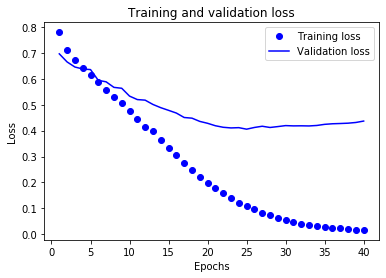

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

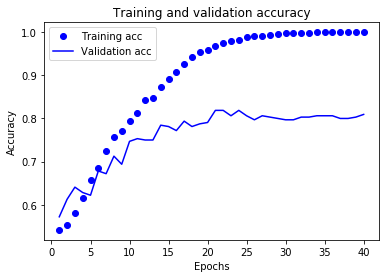

In [18]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Examples randomly extratced online (holdout)

In [19]:
import numpy as np

In [20]:
ext_text1 = "very bad service, we have been waiting for a week to come and change the garbage disposal.  The water is overflowing in the kitchen sink.  We have a 2 year old and we couldn’t wash her dirty dishes.  And I can’t wait until February when our lease runs out to move out."

In [21]:
ext_text2 = "I wanted to share this review with a particular focus in mind. I have been living here for about a year. While when I first moved in, the front office was in transition. However, the customer service I have received from the new office staff has been nothing short of awesome. Ronda, Paula and Jeremy have great whenever I've had an issue with maintenance or questions regarding my lease. They have always treated me with kindness and respect, which is sometimes overlooked in the property-tenant business. I'm happy to be renewing my lease with them."

In [22]:
ss1 = np.array(ext_text1,dtype='object')
ss2 = np.array(ext_text2,dtype='object')

ss11 = ss1.reshape(1,)
ss21 =ss2.reshape(1,)

ss = np.concatenate((ss11,ss21),axis = 0)

In [23]:
ss.shape

(2,)

In [24]:
model.predict(ss)

array([[0.06054954],
       [0.77660596]], dtype=float32)